# Metrics

In this section you will learn more about the different metrics taught to you thus far in the course. 

## Table of Contents
  
- [1. Introduction](#Intro)  
- [2. Import Packages and Functions](#Import)
- [3. Read The Data](#Read-data)
- [4. Data Processing](#data-processing)
- [5. Interactive Graph](#graph)
    - [5.1. Challenge #1](#challenge1)
        - [5.1.1. Challenge #1 Example](#challengeEx)
        - [5.1.2. Challenge #1.1](#challenge1_1)
        - [5.1.3. Challenge #1.2](#challenge1_2)
        - [5.1.4. Challenge #1.3](#challenge1_3)
        - [5.1.5. Challenge #1.4](#challenge1_4)
- [6. Logistic Regression Model](#logistic-regression)
- [7. Accuracy and Classification Report](#A-and-C)
- [8. Calculated Metrics](#Calc-Metrics)
    - [8.1. Challenge #2](#challenge2)
        - [8.1.1. Challenge #2 Example](#challengeEx2)
        - [8.1.2. Challenge #2.1](#challenge2_1)
        - [8.1.3. Challenge #2.2](#challenge2_2)
- [9. Confusion Matrix](#Conf-Matrix)

<a name = "Intro"></a>
## Introduction

To determine our model's performance, we need to be able to calculate several different **metrics**. Metrics are measurements that can be used to analyze the performance and effectiveness of a model's function, such as binary classification (or classification of data between two classes). In this lab, we will learn about this model's purpose which are to determine if a patient has a disease, COVID-19, given two inputs of data. We will also discuss *how* the model classifies patients as healthy or sick. This is a process known as binary classification, and the model goes through training with an activation function in order to produce an answer. Finally, we will calculate the metrics of our model's performance to determine how well our model performed. Besides accuracy, there are many metrics that are extremely important to consider, such as Sensitivity, Specificity, PPV, and NPV. We will also understand what a confusion matrix is and analyze the results that a confusion matrix produces. By the end of this lab, you will be able to determine a binary classifier's performance based off of calculated metrics. Based on these metrics, you may come up with techniques to improve your model's performance, or perhaps even lower the training to prevent overfitting in your model. 

<a name="Import"></a>
## Import Packages and Functions¶

We'll make use of the following packages:
- `numpy` and `pandas` is what we'll use to manipulate our data
- `matplotlib.pyplot` and `seaborn` will be used to produce plots for visualization
- `scikit-learn` will help the model classify the data as disease or no disease, as well as assist in creating visual models of the data
- `util` will provide the locally defined utility functions that have been provided for this assignment

Run the next cells to import all the necessary packages.

In [1]:
# Import numpy and pandas for data manipulation
import pandas as pd
import numpy as np
# Import matplotlib and seaborn for visualizing and graphing our data
import matplotlib.pyplot as plt
import seaborn as sns
# Import a helper function that is written to reference lines 
import helper
# Import sklearn packages to assist in classification for the model
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.metrics import plot_confusion_matrix
# Import Fraction so that we can make a fraction for calculating metrics
from fractions import Fraction

<a name="Read-data"></a>
## Read the data

The following dataset that we will be using comes from the "covid19.csv" file. This is a toy dataset designed entirely for educational purposes (the data in this set is not legitimate). We focus on having an input of two features because it is the easiest to represent graphically. 

In [2]:
# Read the dataset
df = pd.read_csv('covid19.csv')
# Generate some sample data
df.head()

,Time_outside(hours/week),population_density(hundreds_of_people/square_mile),labels
0,11,20,Healthy
1,53,12,Healthy
2,22,40,Healthy
3,22,11,Healthy
4,24,8,Healthy


Sample data from our dataset. 

The **data** includes 100 examples that have entries of time outside in hours per week and the population density for each person in the data. The total number of features per example is 2.

The **target** includes 100 labels that determine whether or not the patient has the disease or not. We only have 1 label for each example. 

<a name="data-processing"></a>
## Data Processing
Divide the csv data into two different parts, the data (includes the features) and the target (which includes the status of the patient)

In [3]:
# Make sure that the data is being read correctly,

# the data's categories are 'Time_outside(hours/week)','population_density(hundreds_of_people/square_mile)', 'labels'
df.columns

Index(['Time_outside(hours/week)',
       'population_density(hundreds_of_people/square_mile)', 'labels'],
      dtype='object')

In [4]:
# data and targets are arrays of the dataset. 
data = df[['Time_outside(hours/week)', 'population_density(hundreds_of_people/square_mile)']].values
targets = df['labels'].values

# data changing and data type
print(data[:7], "return type: " + str(type(data)))
print()
print(targets[:7], "return type: " + str(type(targets)))

[[11 20]
 [53 12]
 [22 40]
 [22 11]
 [24  8]
 [ 3 18]
 [ 1 33]] return type: <class 'numpy.ndarray'>

['Healthy' 'Healthy' 'Healthy' 'Healthy' 'Healthy' 'Healthy' 'Healthy'] return type: <class 'numpy.ndarray'>


We are processing the target names "Healthy" and "sick" to translate into 0 and 1. 0 means "healthy", or no disease, while 1 means "sick", or disease. Binaraizing our labels allows our model to classify between two different classes, which many different activation functions can use. 

In [5]:
# Create a label binarizer that we can use to change our labels from "healthy" and "sick" to 0 and 1.
lb = LabelBinarizer()
# We need to match the shape of our labels column in the dataset, which is why we use fit
lb.fit(targets)
print("Total number of labels: " + str(targets.shape[0]))

Total number of labels: 100


Now that we have initialized a Label Binarizer to the size of targets, we need to transition our labels from "healthy" and "sick" to 0 and 1. The two cells below will demonstrate how the label binarizer do this. 

In [6]:
# Represented classes that are being binarized. These will be the labels that will be transformed
lb.classes_
print(lb.classes_)

['Healthy' 'Sick']


In [7]:
# Transforms the labels to 0s and 1s
y = lb.transform(targets)
print(np.unique(y))

[0 1]


Compare the lb.classes_ with y. We can clearly see that 0 and 1 take the place of Healthy and Sick. SUCCESS! We were able to successfully binarize our labels from "healthy" and "sick" to 0 and 1. This will help us tremendously when classifying data points because our model needs to use an **activation function**, which depends on the label being between 0 and 1 mathematically. You will observe this much closer in "**The Model**" section, where you will see how the **sigmoid** activation function works. 

In [8]:
# Just verify that we did not lose any labels by showing the shape of targets and y
print("Total number of unbinarized labels: " + str(targets.shape[0]))
print("Total number of binarized labels: " + str(y.shape[0]))
print()
# Also verify that the number of unbinarized classes matches the number of classes when we binarized
print("Total number of unbinarized classes: " + str(lb.classes_.shape[0]))
print("Total number of binarized classes: " + str(np.unique(y).shape[0]))

Total number of unbinarized labels: 100
Total number of binarized labels: 100

Total number of unbinarized classes: 2
Total number of binarized classes: 2


Now that we have successfully binarized our labels, we need to manually split our data into train and test sets. This will allow us to use the data we have and not have to collect more. While more data can generally be better for our model to train, data can actually be costly and difficult to obtain. Therefore, we can split up our data to accomodate for this difficulty.

In [9]:
# split our dataset into a training set and test set
# x is features, y is "label"
# we use test_size=0.3 to split the data so that 30 percent of the goes to the test set, allowing 70% for training
trainX, testX, trainY, testY = train_test_split(data, y, test_size=0.3, random_state=0)

Our datasets have now been split up into a training and test set. Let's just verify that we have split our training and test data split without losing input or output features.

In [10]:
# Shows how much data we have in each set
print(f"The training dataset consist of {trainX.shape[0]} samples with {trainX.shape[1]} features. There are {trainY.shape[0]} corresponding output labels.")
print(f"The testing dataset consist of {testX.shape[0]} samples with {testX.shape[1]} features. There are {testY.shape[0]} corresponding output labels.")


The training dataset consist of 70 samples with 2 features. There are 70 corresponding output labels.
The testing dataset consist of 30 samples with 2 features. There are 30 corresponding output labels.


<a name="graph"></a>
## Interactive Graph

A **threshold** is a parameter of the model that distinguishes sections of data to define classes in the dataset. In binary classification, 0.5 is the most standard threshold because classes are most commonly defined as 0 and 1 (or positive and negative). Values less than 0.5 are classified in the 0 (or negative) class, while values equal or greater than 0.5 is classified into the 1 (or positive) class.This can be visually represented in many different ways, such as in graphs or charts (you will see this later on in the notebook). A threshold will allow our model to understand how to classify particular training examples as having the disease or not. 

For this particular example and model, we are only focusing on two features of input so that we can plot the information on a two dimensional graph. It is possible to have more than 2 features or dimensions in the input. In order to obtain the best possible predictions, we can incorporate **gradient descent** in order to fine-tune the parameters of **logistic regression**.

Use the graph to interact with dividing as many red and blue points on opposite sides of the line. The line will act as a visual **threshold**.

In [11]:
# Here is a plot of all features and their labels. Feel free to use the sliders to divide the sick and healthy patients
helper.plot()

interactive(children=(FloatSlider(value=0.0, description='slope', max=10.0, min=-10.0, step=0.05), IntSlider(v…

We can see that the graph has labeled healthy patients as blue, and sick patients as red, and there is a line that can be manipulated.

 Each example on the graph will fall into one of these 4 catagories:

* **True Positive** -- the model correctly predicts the output of an example to be positive. Ground Truth = Positive
* **True Negative** -- the model correctly predicts the output of an example to be negative. Ground Truth = Negative
* **False Positive** -- the model incorrectly predicts the output of an example to be positive. Ground Truth = Negative
* **False Negative** -- the model incorrectly predicts the output of an example to be negative. Ground Truth = Positive

When using Artificial Intelligence in medicine, we need to be extremely careful with the number of examples that the model classifies incorrectly. In this case, we need to be really careful classifying patients with the COVID-19 disease as healthy (or classifying a positive example as negative). Incorrectly classifying patients with the disease can result in major spreading of the disaese, and possibly misinformation about the disease. The consequences of incorrect classifications with COVID-19 are **major**, which is why we need to minimize as many examples as False Positives and Negatives, and achieve as many True Positives and Negatives over many training results and datasets.

In terms of medicine, the categories above translate into these definitions:
* **True Positive** -- the model correctly predicts the patient to have the disease. Ground Truth = Patient has disease.
* **True Negative** -- the model correctly predicts the patient to be healthy. Ground Truth = Patient doesn't have disease.
* **False Positive** -- the model incorrectly predicts the patient to have the disease. Ground Truth = Patient doesn't disease.
* **False Negative** -- the model incorrectly predicts the patient to be healthy. Ground Truth = Patient has disease.

The most important metric to pay attention to is the *False Negatives*. The reason for this is if we diagnose a patient as healthy when they are actually sick, then the consequences may be *severe*. COVID-19 is a highly infectious disease, so we don't want to be spreading the disease. 

We can minimize the number of False Negatives by training our model to be more sensitive to the disease. Thus, as a result, we may lower the number of True Positives we have, and increase the number of False Positives. However, even if the model's accuracy of classifying patients decreases, we are taking more consideration of the consequences by lowering the risk of sick patients being classified as healthy. 

 You will learn more about the effect of manipulating thresholds in the **ROC curves and thresholds** lesson. 

<a name="challenge1"></a>
## CHALLENGE 
**Plot the following information into the graphs below**. Assume that Positive means "Sick", and Negative means "Healthy" (or no disease). Also assume that the line divides the graph such in a way that the area with more "Healthy" or "Sick" examples is where the "Positive" or "Negative" region is (for example, a region that contains 40 healthy examples and 2 sick examples means that that is considered the "Healthy" region, which is then the "Negative" region).

Using the following plot information, determine the number of True Positive, True Negative, False Positive, and False Negative examples defined from the threshold's location.

Note: If you are struggling to use the sliders, you can click on each individual slider and move them using the arrow keys on your keyboard.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li> There are 50 Positive examples and 50 Negative examples total. </li>
    <li> If you can't count the number of examples due to clusters, count how many False examples there are first, then subtract that value from the True examples. </li>
    <li> In each graph, you should see that the Positive region (or group of sick patients) is red, while the Negative region of Healthy Patients is Blue. Your False Positives and Negatives will be blue or red points that are NOT in the same colored region as their own color. </li>
    <li> Run the cell after the challenge blocks to see if you got the right answer or not. </li>
</ul>
<p>

<a name="challengeEx"></a>
#### Example: 
**slope** = -2.50, **yIntercept** = 90, **xIntercept** = -30, **degree** = 1

In [12]:
helper.plot()

interactive(children=(FloatSlider(value=0.0, description='slope', max=10.0, min=-10.0, step=0.05), IntSlider(v…

In [13]:
# Example
TP = 48
TN = 46
FP = 4
FN = 2

In [14]:
helper.example1(TP, TN, FP, FN)

True Positives: 48 is correct!
True Negatives: 46 is correct!
False Positives: 4 is correct!
False Negatives: 2 is correct!

Congratulations on completing Example 1!


<a name="challenge1_1"></a>
#### Challenge 1: 
**slope** = -3.30, **yIntercept** = 90, **xIntercept** = -10, **degree** = 1

In [ ]:
helper.plot()

In [ ]:
# Challenge 1
# Enter answers below
TP = None
TN = None
FP = None
FN = None

In [ ]:
helper.challenge1_1(TP, TN, FP, FN)

<a name="challenge1_2"></a>
#### Challenge 2: 
**slope** = -0.20, **yIntercept** = 30, **xIntercept** = -50, **degree** = 3

In [ ]:
helper.plot()

In [ ]:
# Challenge 2
# Enter answers below
TP = None
TN = None
FP = None
FN = None

In [ ]:
helper.challenge1_2(TP, TN, FP, FN)

<a name="challenge1_3"></a>
#### Challenge 3: 
**slope** = 2.00, **yIntercept** = 50, **xIntercept** = -30, **degree** = 1

In [ ]:
helper.plot()

In [ ]:
# Challenge 3
# Enter answers below
TP = None
TN = None
FP = None
FN = None

In [ ]:
helper.challenge1_3(TP, TN, FP, FN)

<a name="challenge1_4"></a>
#### Challenge 4: 
**slope** = -0.05, **yIntercept** = 90, **xIntercept** = -40, **degree** = 2

In [ ]:
helper.plot()

In [ ]:
# Challenge 4
# Enter answers below
TP = None
TN = None
FP = None
FN = None

In [ ]:
helper.challenge1_4(TP, TN, FP, FN)

Now that you have seen what each graph looks like, which graph do you think represents the best threshold to distinguish two different classes? Which graphs seem like they overfit or underfit the data?

<a name="logistic-regression"></a>
# The Model


The model that we will be using will classify patients with certain features as having a disease or not, based on their weekly time outside and their population density. The parameters include the features, which again is weekly time outside and population density. The activation function is sigmoid because sigmoid is one of the best functions for determining binary classifications. After feeding our parameters into the activation function, we will recieve a number between 0 and 1, which is the classification that the model determines for our data example.

We are using a **Logistic Regression** to classify patients with being healthy or sick ('y'), given their features ('x'). We need to fit our dataset with the model, which will allow our model to train on our data. To model Logistic Regression, we will be using the **sigmoid** function. Sigmoid is very useful for binary classification because there is a defined range of defining classes, which is 0 and 1. We will define 0 as having "no disease" or healthy, and 1 as having the "disease" or sick.

Observe the image below. This image shows how a Logistic Regression model is trained and then classifies images. There are inputs in a vector that are fed into an activation function (which is the circle all the arrow are pointing to), then the activation function outputs a probability that determines of the image belongs to a particular class (in this case, cats vs dogs).

<img src="LogReg_kiank.png" style="width:500px;height:400px"/>

First, we need to create an instant of a **Logistic Regression** model. We use this type of model because Logistic Regression uses a probability to determine which class a piece of data belongs to. We need to train our model with our training dataset, so we will feed our data into the Logistic Regression model.

In [15]:
# Make a Logistic Regression model and fit the model to our data
classifier = LogisticRegression()
# We need to put our dataset into the Logistic Regression. We can only do this if we fit the dataset into the model.
classifier.fit(trainX, trainY.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We have to use ravel() on the trainY because when we split our data, the trainY was 2 dimension. Our data (x) needs to be 2 dimensions because we have 2 different inputs that contribute towards a label (y). However, splitting the dataset caused our label section (or y) to match the shape of our x's, or data. We can only have 1 label per 2 dimension, but having a 2 dimensional array now can cause the data to be misread. Thus, we must use ravel() on trainY to flatten our array back down to 1 dimension, thus matching 2 input dimesnions to 1 output label.

In [16]:
# Demonstrating ravel() on trainY, ndim is a property of np.array for number of dimensions
print("Dimensions of trainY: " + str(trainY.ndim))
print("Dimensions of trainY.ravel(): " + str(trainY.ravel().ndim))

Dimensions of trainY: 2
Dimensions of trainY.ravel(): 1


Now that we have trained our model with our training dataset, we can now use our model to predict the labels of our test dataset. Let's compare how our model did compared to our test labels for the first 10 pieces of data.

In [17]:
# use our trained model to predict the labels for testX
predictions = classifier.predict(testX)
print("Model's predictions: ")
print(str(predictions[:10]))
print("Dataset labels: ")
print(str(testY[:10]))

Model's predictions: 
[0 1 0 1 1 0 0 1 1 1]
Dataset labels: 
[[0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]


To get a deeper analysis of how our model predicted each piece of data, let's see how each piece of data can be calculated, then inserted into an **activation function** to determine what class that data is classified into. 

First, let's pull a piece of sample data and see how this data is calculated into the sigmoid function.

In [18]:
# print a sample piece of data and its label
print(f"Testing sample: {testX[0]} with label: {lb.classes_[testY[0]]}")

Testing sample: [ 3 13] with label: ['Healthy']


Here is the equation and graph of the **sigmoid function**. Notice that as z is larger and positive, the sigmoid function outputs a value closer to 1, and if z is negative, the sigmoid function outputs a value closer to 0. These values will help the model classify between two classes (no disease and disease).

In [19]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

<img src="a.png" style="width:500px;height:400px"/>

The Logistic Regression model assesses a multiplier coefficient to multpliy to each input value, in addition to an intercept value. The idea with this is that the model is mathematically trying to determine whether a piece of data belongs into the 0 or 1 class, but must have a system where all values in the dataset can fall in between 0 and 1. This is why we had to make a training dataset. We now can create a value that can be fed into our activation function above.

In [20]:
# use the coefficients from the classifiers, 
# will be used to calculate in the sigmoid function
m1, m2, b = classifier.coef_[0][0], classifier.coef_[0][1], classifier.intercept_[0]
print("Value of input 1 coefficient (m1): " + str(m1))
print("Value of input 2 coefficient (m2): " + str(m2))
print("Value of intercept (b): " + str(b))

Value of input 1 coefficient (m1): 0.14218154163868035
Value of input 2 coefficient (m2): 0.13050685756785033
Value of intercept (b): -13.225582767659903


We can now multiply these coefficients to the input values, then add the intercept to get our z value. Z will be fed into the sigmoid function, which will then determine if we put this piece of data in the 0 or 1 class. 

In [21]:
# Use our coefficients and multiply them as weights as an equation into z, which
# we put into our sigmoid function.
print("Value from (m1) * first input value: " + str(m1) + " * " + str(testX[0][0]) + 
      " = " + str(m1*testX[0][0]))
print("Value from (m2) * second input value: " + str(m2) + " * " + str(testX[0][1]) + 
      " = " + str(m2*testX[0][1]))
print("Value of intercept (b): " + str(b))

print()

z = (m1 * testX[0][0]) + (m2 * testX[0][1]) + (b)
print("z = " + str(m1*testX[0][0]) + " + " + str(m2*testX[0][1]) + " + " + str(b) + " = " + str(z))
print()
print("z = " + str(z))
print("sigmoid(z) = " + '%.8f' % sigmoid(z))

Value from (m1) * first input value: 0.14218154163868035 * 3 = 0.42654462491604106
Value from (m2) * second input value: 0.13050685756785033 * 13 = 1.6965891483820543
Value of intercept (b): -13.225582767659903

z = 0.42654462491604106 + 1.6965891483820543 + -13.225582767659903 = -11.102448994361808

z = -11.102448994361808
sigmoid(z) = 0.00001508


We can clearly see that if z is very large and negative, the sigmoid of z will be very close to 0. If z is very large and positive, the sigmoid of z will be very close to 1. If z is close to 0, then sigmoid of z will be around 0.5, and will classify the data according to if sigmoid of z is closer to 0 or 1. This sigmoid function, also referred to as an activation function, allows our model to classify data on a scale from 0 to 1, which is why it was extremely important that we binarized our data.

<a name="A-and-C"></a>
## Accuracy and Classification Report

<p>
Now that we have collected our data and have a classifier to define our classes, we can now calculate our metrics. You will see here how metrics can determine the success of the model's performance. 

**Accuracy** is actually a metric that determines the correctness of the model's predictions. It is a metric that is calculated between 0 and 1, where 1 is most correct and 0 is least correct. 

$$ Accuracy = \frac{\text{Correctly Classified Examples}}{\text{Total Examples Classified by the Model}} $$

In [22]:
# calculate our accuracy from our test set
print("Accuracy: " + str(accuracy_score(testY, predictions)))

Accuracy: 0.9666666666666667


There are many other metrics we can use to determine the model's performance in classifying between classes. Here are some examples:
- **Precision** is the ratio for the classifier to be labeled correctly
- **Recall** is the ratio of finding all 0 or 1 examples exclusively
- **F1-score** is the mean of precision and recall (1 is best score)
- **Support** is the number of occurnces that were in testY

In [23]:
# print the classification report. 
print()
print(classification_report(testY, predictions, target_names=lb.classes_))


              precision    recall  f1-score   support

     Healthy       0.94      1.00      0.97        15
        Sick       1.00      0.93      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Note:
- Macro Average (macro avg) refers to the average of all pieces of data, regardless of input importance
- Weighted Average (weighted avg) refers to the average of data with multiplied weights to different pieces of input, depending on the importance of a particular input

<a name="Calc-Metrics"></a>
## Calculated Metrics

Here, we will show you how to actually compute important metrics for our model.

Recall the definitions of True Positives, True Negatives, False Positives, and False Negatives. Each example will fall into one of these 4 catagories:

* **True Positive** -- the model correctly predicts the output of an example to be positive 
* **True Negative** -- the model correctly predicts the output of an example to be negative
* **False Positive** -- the model incorrectly predicts the output of an example to be positive 
* **False Negative** -- the model incorrectly predicts the output of an example to be negative 

We can use the values as described above to calculate the sensitivity, specificity, PPV, and NPV. These values can be extracted from the metrics above. Here are the definitions and equations for each:

- **Sensitivity** -- The probability that the model predicts positive (or 1) *given* that the ground truth is positive (or 1)
- **Specificity** -- The probability that the model predicts negative (or 0) *given* that the ground truth is negative (or 0)
- **Positive Predicitve Value (PPV)** -- The probability that the ground truth is positive (or 1) *given* that the model predicts positive (or 1)
- **Negative Predictive Value (PPV)** -- The probability that the ground truth is negative (or 0) *given* that the model predicts negative (or 0)


$$ Sensitivity = \frac{\text{True Positive}}{\text{True Positive + False Negative}} $$


$$ Specificity = \frac{\text{True Negative}}{\text{False Positive + True Negative}} $$


$$ PPV = \frac{\text{True Positive}}{\text{True Positive + False Positive}} $$


$$ NPV = \frac{\text{True Negative}}{\text{True Negative + False Negative}} $$

In [24]:
# This cell helps determine all of the True/False positives and negatives
TP = 0
TN = 0
FP = 0
FN = 0

for i in range(len(testY)):
    # if prediction and label for image is 1, True Positive
    if (predictions[i] == 1 and testY[i] == 1):
        TP += 1
    # if prediction and label for image is 0, True Negative
    elif(predictions[i] == 0 and testY[i] == 0):
        TN += 1
    # if prediction is Positive but label for image is Negative, False Positive
    elif(predictions[i] == 1 and testY[i] == 0):
        FP += 1
    # if prediction is Positive but label for image is Negative, False Positive
    elif(predictions[i] == 0 and testY[i] == 1):
        FN += 1
print("True Positives: " + str(TP))
print("True Negatives: " + str(TN))
print("False Positives: " + str(FP))
print("False Negatives: " + str(FN))
print()
print("Observe these values in the calculated metrics below and in the Confusion Matrix section.")

True Positives: 14
True Negatives: 15
False Positives: 0
False Negatives: 1

Observe these values in the calculated metrics below and in the Confusion Matrix section.


We now have the values above to calculate our metrics. These will help us understand our **confusion matrix**. The **confusion matrix** can also help us calculate our metric values too.

$$ Sensitivity = \frac{(14)}{(14) + (1)} = \frac{14}{15} $$


$$ Specificity = \frac{(15)}{(0) + (15)} = \frac{15}{15} = 1 $$


$$ PPV = \frac{(14)}{(14) + (0)} = \frac{14}{14} = 1 $$


$$ NPV = \frac{(15)}{(15) + (1)} = \frac{15}{16} $$

<a name="challenge2"></a>
## CHALLENGE
Given the following information, calculate the True/False Positives/Negatives, as well as the Sensitivity, Specificity, PPV, and NPV by filling in the **None** sections.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li> Run the cell after each challenge block to see if you got the right answers. Once you get each answer correct, you will see a congradulations message. </li>
    <li> When entering values into a Fraction object, you may assume that Fractions will reduce. Thus, entering Fraction(25, 100) will be the same as entering Fraction(1, 4), and both answers are acceptable and are graded as the same value. For more information, see <a href="https://docs.python.org/3/library/fractions.html" > fraction.Fraction(numerator=0, denominator=1) </a>
    

</ul>
<p>

<a name="challengeEx2"></a>
#### Example

We are training our network to recognize a fracture in a bone from an x-ray image. Out of the 50 x-rays in the dataset, 35 of the x-rays show a fracture in a bone. The model was able to detect that 33 x-rays have a fracture in a bone from these 35 x-rays. Out of the remaining images from the dataset (ground truth is no fracture), all of the images were predicted that there was no fracture. *Assume a fracture in the x-ray to be Positive and no fracture to be Negative*.

In [25]:
# Example
# Enter answers below
TP = 33
TN = 15
FP = 0
FN = 2
Sensitivity = Fraction(33, 35)
Specificity = Fraction(15, 15)
PPV = Fraction(33, 33)
NPV = Fraction(15, 17)

In [26]:
helper.example2(TP, TN, FP, FN, Sensitivity, Specificity, PPV, NPV)

True Positives: 33 is correct!
True Negatives: 15 is correct!
False Positives: 0 is correct!
False Negatives: 2 is correct!

Sensitivity: 33/35 is correct!
Specificity: 1 is correct!
PPV: 1 is correct!
NPV: 15/17 is correct!

Congratulations on completing Example 2!


<a name="challenge2_1"></a>
**Challenge 1**:
We are training our network to recognize a stroke from an MRI. We have a dataset of 250 MRI's. 175 of the MRI's show that the brain does not have a stroke. 30 of the 175 MRI's were classified as a stroke. Out of the remaining MRI's in the dataset (ground truth is a stroke), 20 of them were not classified as a stroke. *Assume an MRI's showing a stroke to be Positive and an MRI's not showing a stroke to be Negative*.

In [ ]:
# Challenge 1
# Enter answers below
TP = None
TN = None
FP = None
FN = None
Sensitivity = Fraction(None, None)
Specificity = Fraction(None, None)
PPV = Fraction(None, None)
NPV = Fraction(None, None)

In [ ]:
helper.challenge2_1(TP, TN, FP, FN, Sensitivity, Specificity, PPV, NPV)

<a name="challenge2_2"></a>
**Challenge 2**: We are training a network to recognize Type I and Type II Diabetes from a dataset of medical images. However, the dataset also contain images that are neither Type I or Type II Diabetes. Out of a database of 750 images, 100 of the images are neither Type I or Type II Diabetes. There are 400 Type I Diabetes images and the model correctly predicted 300 of them. 25 of the 400 images were classified as Type II Diabetes. The remaining 250 images are Type II Diabetes images, the model predicted that 40 of them were neither Type I or Type II Diabetes, and that 10 of the images were Type I Diabetes. *Assume Positives to be Type I Diabetes, and Negative to be Type II Diabetes images*.

Note: You may ignore the *class* of neither Type I or Type II Diabetes images, but you must consider these images when calculating your metrics.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li> Try not to think too much about "Type I" vs. "Type II" vs. "neither", but rather think about "Type I" vs. "not Type I" and "Type II" vs. "not Type II". The two "not" classes will be shared together. </li>
    <li> Since we can ignore the class of neither Type I or Type II images, think about how these images represent the positives and negatives that we are focusing on. Are they True or False? Will they always be True or False? </li>
    <li> There are 750 total images, but 100 of the images are neither Type I or Type II. Think about the definition of True Positives, True Negatives, False Positives, and False Negatives. Should the sum of all of these categories be 650 or 750? </li>
    <li> Given that our data will fall under the Positive or Negative categories and that the class of neither Type I nor Type II images are Positive or Negative, how will this effect our True/False Positives/Negatives? </li>

</ul>
<p>

In [ ]:
# Challenge 2
# Enter answers below
TP = None
TN = None
FP = None
FN = None
Sensitivity = Fraction(None, None)
Specificity = Fraction(None, None)
PPV = Fraction(None, None)
NPV = Fraction(None, None)

In [ ]:
helper.challenge2_2(TP, TN, FP, FN, Sensitivity, Specificity, PPV, NPV)

<a name="Conf-Matrix"></a>
## Confusion Matrix
A Confusion Matrix is a metric that allows us to visualize our True/False Positives/Negatives. This metric will allow us to visualize the number of correctly and incorrectly predicted examples, which can help us calculate our sensitivity, specificity, PPV, and NPV.

Observe the values of the confusion matrix below. Where are all of the True/False Positives/Negatives? 

How does each value relate to all of the metrics calculate above (before the challenge)? 

What do the colors represent in the matrix? 

Confusion Matrix
[[15  0]
 [ 1 14]]



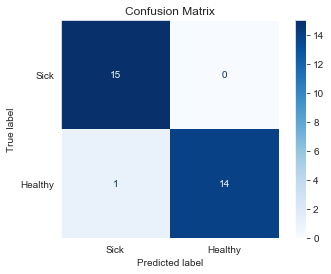

In [27]:
# Set up and print out the confusion matrix. 

# This confusion matrix is non-normalized, which shows the total number of 
# examples in the training set that fall into the 4 catagories

mat = plot_confusion_matrix(classifier, testX, testY, 
                            display_labels=["Sick", "Healthy"],
                            cmap=plt.cm.Blues,
                            normalize=None)
mat.ax_.set_title("Confusion Matrix")
print("Confusion Matrix")
print(mat.confusion_matrix)
plt.grid(False)
print()

You should recognize that the darker blue colors represents a higher quantity for that particular metric, while paler blue colors represent less of a quantity. We can also observe that since our model had a high accuracy (27 out of 30 classified correctly), the majority of our examples are in the top left and bottom right sections of the confusion matrix. 

We can also represent the confusion matrix with a normalization metric. A **normalized confusion matrix** is a confusion matrix where all values are between 0 and 1. The purpose of the normalization is to see classifications of classes as a *percentage*, rather than just numbers. For instance, the group of True Positives in the nomalized confusion matrix is the *percentage* of Positive examples that are correctly classified as Positive. The False Positives is the *percentage* of Positive Examples that are classified as Negative. 

Normalized Confusion Matrix
[[1.   0.  ]
 [0.07 0.93]]



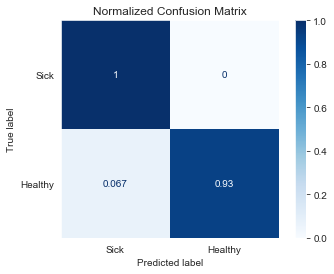

In [28]:
# Set up and print out the confusion matrix. 

# This confusion matrix is normalized, which shows the total number of examples
# in the training set as a percentage between 0 and 1

# Sets the number of decimal points in the printed confusion matrix
np.set_printoptions(precision=2)

mat = plot_confusion_matrix(classifier, testX, testY, 
                            display_labels=["Sick", "Healthy"],
                            cmap=plt.cm.Blues,
                            normalize='true')
mat.ax_.set_title("Normalized Confusion Matrix")
print("Normalized Confusion Matrix")
print(mat.confusion_matrix)
plt.grid(False)
print()

## Great job!

You now know how to calculate metrics given a dataset. We can train our model to recognize patterns in our dataset and determine if our patient has COVID-19 or not. Metrics will help us determine the accuracy of our model to determine further patients. As a treatment to this disease, we can analyze the relationship between features and the status of the patient in order to understand the causes of COVID-19.